# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_08 = pd.read_csv("clean_08.csv")
df_18 = pd.read_csv("clean_18.csv")

In [2]:
df_08['years'] = '08'
df_18['years'] = '18'
df = df_08.merge(df_18, how = 'outer')
df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,years
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no,08
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no,08
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no,08
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes,08
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes,08


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [28]:
df.groupby('years')['fuel'].value_counts()

years  fuel       
08     Gasoline       984
       CNG              1
       ethanol          1
       gas              1
18     Gasoline       749
       Ethanol         26
       Gas             26
       Diesel          19
       Electricity     12
Name: fuel, dtype: int64

Text(0, 0.5, 'Number of Unique Models')

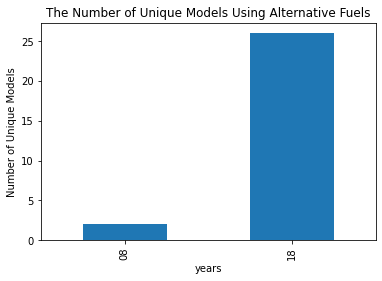

In [34]:
alt_source = ['ethanol', 'Ethanol', 'Electricity', 'CNG']
df.query('fuel in {}'.format(alt_source)).groupby('years')['model'].nunique().plot(kind = 'bar')
plt.title('The Number of Unique Models Using Alternative Fuels')
plt.xlabel('years')
plt.ylabel('Number of Unique Models')

### Q2: How much have vehicle classes improved in fuel economy?  

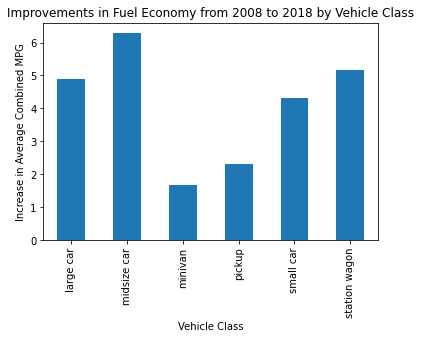

In [44]:
(df_18.groupby('veh_class')['cmb_mpg'].mean() - df_08.groupby('veh_class')['cmb_mpg'].mean()).dropna().plot(kind = 'bar')
plt.title("Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')
plt.show()

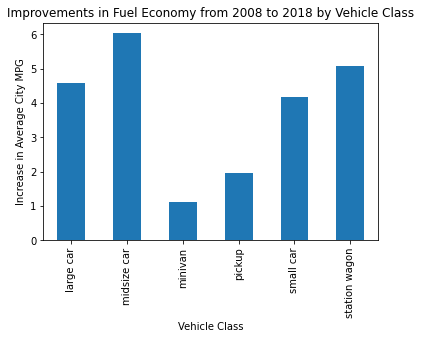

In [45]:
(df_18.groupby('veh_class')['city_mpg'].mean() - df_08.groupby('veh_class')['city_mpg'].mean()).dropna().plot(kind = 'bar')
plt.title("Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average City MPG')
plt.show()

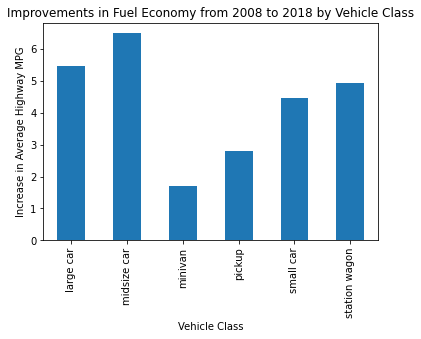

In [46]:
(df_18.groupby('veh_class')['hwy_mpg'].mean() - df_08.groupby('veh_class')['hwy_mpg'].mean()).dropna().plot(kind = 'bar')
plt.title("Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Highway MPG')
plt.show()

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [52]:
df.groupby(['years', 'smartway']).mean()

displ       cyl  air_pollution_score   city_mpg    hwy_mpg  \
years smartway                                                                  
08    no        4.056837  6.771005             6.288303  15.133443  21.299835   
      yes       2.602895  4.826316             7.268421  20.984211  28.413158   
18    Elite     1.970588  4.000000             7.000000  53.235294  53.117647   
      No        3.270304  5.720994             3.798343  19.325967  26.708564   
      Yes       1.753846  3.923077             4.879121  31.483516  39.296703   

                  cmb_mpg  greenhouse_gas_score  
years smartway                                   
08    no        17.316310              4.149918  
      yes       23.736842              6.868421  
18    Elite     53.000000             10.000000  
      No        22.041436              4.276243  
      Yes       34.439560              7.538462

### Q4: What features are associated with better fuel economy?

<AxesSubplot:xlabel='fuel'>

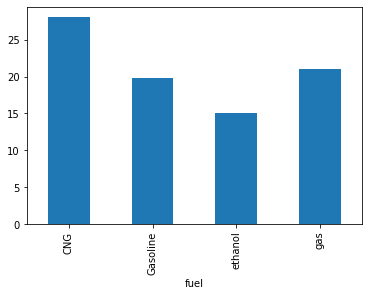

In [53]:
df_08.groupby('fuel')['cmb_mpg'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='fuel'>

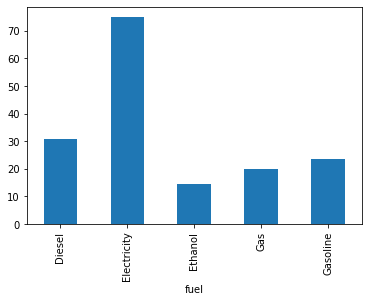

In [54]:
df_18.groupby('fuel')['cmb_mpg'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='model'>

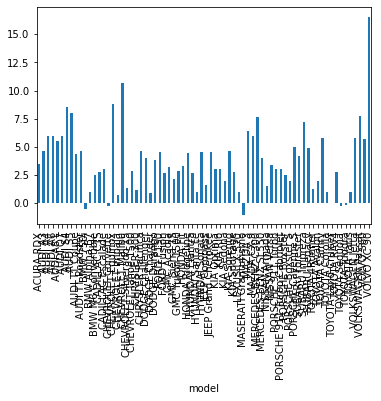

In [58]:
(df_18.groupby('model')['cmb_mpg'].mean() - df_08.groupby('model')['cmb_mpg'].mean()).dropna().plot(kind = 'bar')

In [72]:
means = (df_18.groupby('model')['cmb_mpg'].mean() - df_08.groupby('model')['cmb_mpg'].mean())
means[means == means.max()]

model
VOLVO XC 90    16.533333
Name: cmb_mpg, dtype: float64